# Alzheimer's Analysis:
* Portions of code borrowed from [Alzheimer's Prediction](https://github.com/grantgasser/Alzheimers-Prediction) 
* Updating for HC-SRI-AlzRes 6/21/21

In [142]:
import numpy as np
import sklearn as sk
import pandas as pd
import os

### Load Data, Drop NA 

In [182]:
dat = pd.read_csv('C:/Users/Bella/Desktop/AD CSVs/data_ADNI1GO2.csv') 

X = dat 
Y = dat['DX_bl_recoded']
del dat 


X = X.drop('DX_bl_recoded', axis=1)

print(X)

       AGE  PTEDUCAT  APOE4  MMSE_bl  CMMED_aleve  CMMED_amlodipine  \
0     74.3        16      0       28            0                 0   
1     81.3        18      1       20            0                 0   
2     67.5        10      0       27            0                 0   
3     73.7        16      0       29            0                 0   
4     80.4        13      0       25            0                 0   
...    ...       ...    ...      ...          ...               ...   
1483  76.7        19      1       29            0                 0   
1484  76.1        16      0       30            0                 0   
1485  71.8        14      0       30            0                 0   
1486  66.5        20      0       29            0                 0   
1487  71.8        12      1       26            0                 0   

      CMMED_aricept  CMMED_asa  CMMED_aspirin  CMMED_atenolol  ...  RCT19  \
0                 0          0              1               0  ...    

In [144]:
X.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 59 columns):
AGE                                       468 non-null float64
PTEDUCAT                                  468 non-null int64
APOE4                                     468 non-null int64
MMSE_bl                                   468 non-null int64
CMMED_amlodipine                          468 non-null int64
CMMED_aspirin                             468 non-null int64
CMMED_atorvastatin                        468 non-null int64
CMMED_calcium                             468 non-null int64
CMMED_coq10                               468 non-null int64
CMMED_donepezil                           468 non-null int64
CMMED_fish oil                            468 non-null int64
CMMED_levothyroxine                       468 non-null int64
CMMED_lisinopril                          468 non-null int64
CMMED_losartan                            468 non-null int64
CMMED_magnesium                        

## Train/Test Split
* `X_train` and `y_train` will further split into train/valid splits using K-fold CV
* `X_test` and `y_test` will be held out

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

print('X_train:', X_train.shape, '\ty_train:', y_train.shape)
print('X_test:', X_test.shape, '\ty_test:', y_test.shape)
num_test = X_test.shape[0]

X_train: (1190, 152) 	y_train: (1190,)
X_test: (298, 152) 	y_test: (298,)


## Logistic Regression, Random Forest, KNN, MLP, DT, SVM, SGD

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier #added by bmancini
from sklearn import svm #added by bmancini
from sklearn.linear_model import SGDClassifier #added by bmancini
from sklearn.preprocessing import StandardScaler #added by bmancini
from sklearn.pipeline import make_pipeline #added by bmancini
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [184]:
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
print('Validation Accuracy = ', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))

c:\users\bella\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Validation Accuracy =  68.99%


c:\users\bella\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [185]:
rf_clf = RandomForestClassifier(n_estimators=200)
print('Validation Accuracy = ', format(cross_val_score(rf_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  70.92%


In [186]:
dt_clf = DecisionTreeClassifier(random_state=0)
print('Validation Accuracy = ', format(cross_val_score(dt_clf,X_train,y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  64.54%


In [187]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
print('Validation Accuracy = ', format(cross_val_score(knn_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  45.29%


In [188]:
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
print('Validation Accuracy = ', format(cross_val_score(svm_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  53.36%


In [189]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(15, 10), alpha=3, learning_rate='adaptive', max_iter=100000)
print('Validation Accuracy = ', format(cross_val_score(mlp_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  60.50%


In [190]:
sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
print('Validation Accuracy = ', format(cross_val_score(sgd_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  64.54%


## Prediction Evaluation: SGD Logistic

In [191]:
sgd_clf.fit(X_train,y_train) 
predicts = sgd_clf.predict(X_test)
sgd_clf_accuracy = (predicts == y_test)
print('Test Accuracy =', format( np.sum(sgd_clf_accuracy)/num_test, '.2%'))

Test Accuracy = 64.77%


In [193]:
misclassified_index = (predicts != y_test)

X_misclassified = X_test[misclassified_index]
y_misclassified = y_test[misclassified_index]
preds_misclassified = predicts[misclassified_index]

X_misclassified

,AGE,PTEDUCAT,APOE4,MMSE_bl,CMMED_aleve,CMMED_amlodipine,CMMED_aricept,CMMED_asa,CMMED_aspirin,CMMED_atenolol,...,RCT19,RCT20,RCT9,RCT12,RCT1407,RCT183,RCT3,RCT392,RCT6,RCT8
454,86.4,7,0,25,0,0,0,0,0,1,...,119,220,4.0,6.8,74,9.6,18,1.1,23,7.0
449,82.5,12,0,27,0,0,0,0,1,0,...,93,177,3.9,6.8,78,9.2,11,1.2,33,7.2
70,72.5,18,1,30,0,0,0,0,1,0,...,118,157,3.7,7.7,56,10.6,43,0.8,27,4.6
1099,84.3,17,2,29,0,0,0,0,1,0,...,122,189,3.0,6.8,61,10.0,15,1.4,27,7.6
1479,76.8,16,0,30,0,0,0,0,1,0,...,111,179,3.3,7.1,65,9.6,19,1.2,25,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,81.5,12,0,29,0,0,0,0,0,1,...,266,151,3.1,7.1,117,9.7,29,1.1,22,6.4
732,73.8,12,1,26,0,0,1,0,1,0,...,101,206,4.1,6.9,74,9.6,22,1.3,20,5.9
72,73.2,18,0,30,0,0,0,0,1,0,...,114,201,3.0,7.6,102,10.2,39,0.8,20,6.6
147,56.5,20,0,23,0,0,1,0,0,1,...,265,249,3.9,7.3,63,9.9,20,0.9,20,6.2


In [194]:
# will show the predictions that did not match actual diagnosis. keeps a counter for miscalcs 
print('Pred'.ljust(5), 'Y')
print('-----------')

over_estimate = under_estimate = total_miss = 0
for pred, y in zip(preds_misclassified, y_misclassified):
    print(pred.ljust(5), y)
    
    if (y == 'CN' and pred == 'AD') or (y == 'AD' and pred == 'CN'):
        total_miss += 1
    
    if y == 'CN':
        over_estimate += 1
        
    elif y == 'AD':
        under_estimate += 1
    
    # y is 'LMCI'
    else:
        if pred == 'CN':
            under_estimate += 1
        elif pred == 'AD':
            over_estimate += 1

Pred  Y
-----------
CN    MCI
CN    MCI
MCI   CN
MCI   CN
MCI   CN
AD    MCI
MCI   CN
MCI   AD
MCI   CN
CN    MCI
MCI   AD
MCI   CN
AD    MCI
MCI   CN
CN    MCI
CN    MCI
AD    MCI
CN    MCI
MCI   CN
MCI   CN
MCI   AD
MCI   CN
AD    MCI
MCI   CN
MCI   CN
CN    MCI
AD    MCI
CN    MCI
MCI   CN
CN    MCI
CN    MCI
CN    MCI
MCI   CN
MCI   AD
AD    MCI
MCI   CN
MCI   CN
AD    MCI
CN    MCI
MCI   AD
AD    MCI
MCI   CN
CN    MCI
MCI   CN
CN    MCI
MCI   CN
MCI   AD
CN    MCI
MCI   AD
MCI   CN
CN    MCI
AD    MCI
CN    MCI
MCI   CN
AD    MCI
AD    MCI
MCI   CN
MCI   CN
CN    MCI
MCI   CN
MCI   AD
MCI   CN
AD    MCI
MCI   AD
MCI   CN
MCI   CN
AD    MCI
MCI   CN
CN    MCI
MCI   CN
CN    MCI
MCI   AD
CN    MCI
CN    MCI
CN    MCI
MCI   CN
MCI   CN
AD    MCI
CN    MCI
CN    MCI
CN    MCI
MCI   CN
CN    MCI
MCI   AD
CN    MCI
MCI   AD
MCI   AD
CN    MCI
CN    MCI
MCI   CN
MCI   CN
CN    MCI
AD    MCI
MCI   CN
CN    MCI
MCI   CN
MCI   CN
MCI   CN
AD    MCI
CN    MCI
CN    MCI
MCI   AD
MCI   CN
MCI

In [195]:
print('Model over-estimated severity of cognitive problems:', over_estimate)
print('Model under-estimated severity of cognitive problems:', under_estimate)
print('Model was way off (total miss):', total_miss)

Model over-estimated severity of cognitive problems: 55
Model under-estimated severity of cognitive problems: 50
Model was way off (total miss): 0


# Evaluate feature importances 

In [196]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
# https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances[:10])

               Importance
MMSE_bl          0.145855
CMMED_aricept    0.036733
AGE              0.033086
CMMED_namenda    0.028386
BAT126           0.020441
RCT19            0.020196
RCT14            0.020193
HMT15            0.020166
RCT20            0.019674
HMT8             0.019667


In [198]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [199]:
feature_importancesDT = pd.DataFrame(dt_clf.feature_importances_, index=X_train.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importancesDT[:10])

               Importance
MMSE_bl          0.325347
AGE              0.070442
CMMED_aricept    0.051841
HMT17            0.023509
HMT18            0.023048
HMT40            0.020729
HMT8             0.020309
RCT20            0.020141
HMT9             0.019689
HMT7             0.018728


In [200]:
#This code will use the extra trees classifier, fit importance functions to extract features that are top scoring
#Features with the highest score are the top scores

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
res = model.feature_importances_ 


print(res)

[0.024 0.011 0.021 0.113 0.003 0.002 0.061 0.003 0.007 0.003 0.001 0.004
 0.002 0.004 0.001 0.004 0.001 0.002 0.003 0.008 0.003 0.007 0.003 0.003
 0.004 0.003 0.002 0.002 0.002 0.006 0.003 0.004 0.005 0.006 0.002 0.001
 0.001 0.002 0.005 0.003 0.004 0.003 0.003 0.036 0.003 0.002 0.003 0.003
 0.001 0.001 0.003 0.004 0.001 0.002 0.009 0.002 0.002 0.003 0.002 0.001
 0.005 0.006 0.005 0.003 0.007 0.002 0.002 0.003 0.006 0.002 0.002 0.004
 0.002 0.001 0.003 0.002 0.003 0.002 0.002 0.002 0.001 0.004 0.001 0.004
 0.004 0.005 0.002 0.004 0.005 0.002 0.002 0.003 0.002 0.003 0.001 0.004
 0.003 0.003 0.01  0.004 0.009 0.008 0.009 0.003 0.006 0.008 0.007 0.006
 0.004 0.006 0.007 0.003 0.006 0.006 0.007 0.006 0.008 0.011 0.01  0.012
 0.005 0.01  0.01  0.01  0.009 0.009 0.011 0.011 0.01  0.009 0.008 0.008
 0.007 0.01  0.011 0.01  0.01  0.01  0.009 0.009 0.009 0.01  0.009 0.008
 0.01  0.008 0.008 0.01  0.007 0.009 0.01  0.009]


### ETC Results for ALL ADNI12G
- MMSE, Aricept, APOE4, AGE

### ETC Results for ALL ADNI3 
- Symptom_19, AGE, Donepezil, APOE4, symptom_7

### Highest Scoring features from ETC Biomark 12G
- RCT6
- HMT13
- RCT8
- HMT102
- BAT126

In [168]:
#Remember index starts at 0 
pos = 48
colname = X.columns[pos]
print (colname)

IHSYMPTOM_7


# Feature Selection with Univariate Statistical Tests 

In [201]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=4) #f_classif computes ANOVA
fit = test.fit(X_train, y_train)
scores = test.scores_[test.get_support()]
names = X_train.columns.values[test.get_support()]
names_scores = list(zip(names, scores))

ns_df = pd.DataFrame(data = names_scores, columns= ['Feat_names','F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending = [False, True])
print(ns_df_sorted)


      Feat_names    F_Scores
1        MMSE_bl  861.788603
2  CMMED_aricept  172.501100
3  CMMED_namenda  153.452760
0          APOE4   59.327661


# Feature Extraction with RFE 

In [202]:
# feature elimination using regressing and RFE model
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

c:\users\bella\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\bella\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Column: 0, Selected False, Rank: 89.000
Column: 1, Selected False, Rank: 96.000
Column: 2, Selected False, Rank: 13.000
Column: 3, Selected False, Rank: 7.000
Column: 4, Selected False, Rank: 112.000
Column: 5, Selected False, Rank: 136.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 40.000
Column: 8, Selected False, Rank: 86.000
Column: 9, Selected False, Rank: 21.000
Column: 10, Selected False, Rank: 141.000
Column: 11, Selected False, Rank: 41.000
Column: 12, Selected False, Rank: 146.000
Column: 13, Selected False, Rank: 94.000
Column: 14, Selected False, Rank: 28.000
Column: 15, Selected False, Rank: 18.000
Column: 16, Selected False, Rank: 66.000
Column: 17, Selected False, Rank: 107.000
Column: 18, Selected False, Rank: 25.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 2.000
Column: 21, Selected False, Rank: 85.000
Column: 22, Selected False, Rank: 99.000
Column: 23, Selected False, Rank: 113.000
Column: 24, Selected False

In [205]:
pos = 43
colname = X.columns[pos] 
print (colname)

CMMED_namenda


### Results from RFE  
- Amlodipine, Diovan and Namenda selected from data_ADNI12G run 

### Results from RFE ADNI3 All
- COQ10, Depression, Sympton_18

## Prediction Evaluation: LR 

In [177]:
log_clf.fit(X_train, y_train)

log_clf_preds = log_clf.predict(X_test)
    
log_clf_accuracy = (log_clf_preds == y_test)
print('Test Accuracy =', format( np.sum(log_clf_accuracy)/num_test, '.2%'))

Test Accuracy = 61.70%


In [178]:
misclassified_index = (log_clf_preds != y_test)

X_misclassified = X_test[misclassified_index]
y_misclassified = y_test[misclassified_index]
preds_misclassified = log_clf_preds[misclassified_index]

X_misclassified.head()

,AGE,PTEDUCAT,APOE4,MMSE_bl,CMMED_amlodipine,CMMED_aspirin,CMMED_atorvastatin,CMMED_calcium,CMMED_coq10,CMMED_donepezil,...,IHSYMPTOM_8,IHSYMPTOM_9,IHSYMPTOM_10,IHSYMPTOM_11,IHSYMPTOM_12,IHSYMPTOM_13,IHSYMPTOM_14,IHSYMPTOM_17,IHSYMPTOM_18,IHSYMPTOM_19
427,61.9,16,0,29,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
444,72.9,12,0,29,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
159,73.2,14,1,29,0,0,1,0,1,0,...,1,1,1,1,1,1,0,0,0,0
126,70.4,16,0,23,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
386,62.7,12,0,28,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [179]:
print('Pred'.ljust(5), 'Y')
print('-----------')

over_estimate = under_estimate = total_miss = 0
for pred, y in zip(preds_misclassified, y_misclassified):
    print(pred.ljust(5), y)
    
    if (y == 'CN' and pred == 'AD') or (y == 'AD' and pred == 'CN'):
        total_miss += 1
    
    if y == 'CN':
        over_estimate += 1
        
    elif y == 'AD':
        under_estimate += 1
    
    # y is 'LMCI'
    else:
        if pred == 'CN':
            under_estimate += 1
        elif pred == 'AD':
            over_estimate += 1

Pred  Y
-----------
CN    MCI
CN    MCI
MCI   CN
MCI   AD
CN    MCI
MCI   CN
MCI   AD
CN    MCI
AD    MCI
MCI   CN
CN    MCI
CN    MCI
CN    MCI
MCI   CN
MCI   CN
CN    MCI
MCI   CN
MCI   CN
CN    MCI
MCI   AD
AD    MCI
CN    MCI
MCI   AD
MCI   AD
CN    MCI
CN    MCI
CN    MCI
MCI   CN
MCI   AD
CN    MCI
CN    MCI
AD    MCI
CN    AD
MCI   AD
MCI   CN
AD    MCI


In [180]:
print('Model over-estimated severity of cognitive problems:', over_estimate)
print('Model under-estimated severity of cognitive problems:', under_estimate)
print('Model was way off (total miss):', total_miss)

Model over-estimated severity of cognitive problems: 13
Model under-estimated severity of cognitive problems: 23
Model was way off (total miss): 1


## Plots 

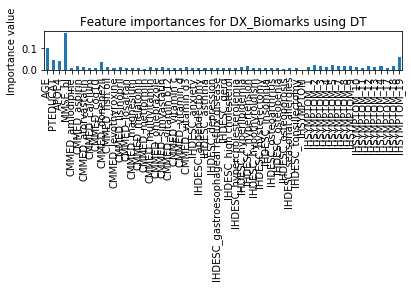

In [181]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)


fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for DX_Biomarks using DT")
ax.set_ylabel("Importance value")
fig.tight_layout()

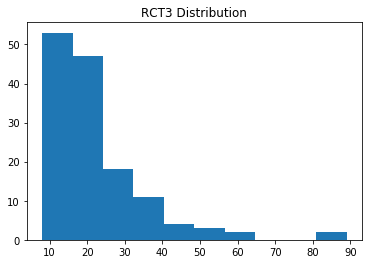

count    140.000000
mean      22.600000
std       13.125186
min        8.000000
25%       14.750000
50%       19.000000
75%       27.250000
max       89.000000
Name: RCT3, dtype: float64


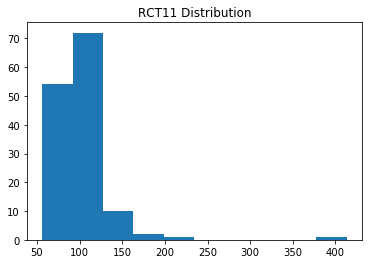

count    140.000000
mean     101.557143
std       33.304411
min       56.000000
25%       88.000000
50%       95.500000
75%      104.000000
max      413.000000
Name: RCT11, dtype: float64


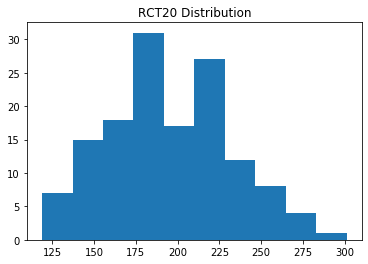

count    140.000000
mean     194.921429
std       36.661993
min      119.000000
25%      169.000000
50%      191.000000
75%      219.250000
max      301.000000
Name: RCT20, dtype: float64


In [58]:

for var in ['RCT3','RCT11','RCT20']:
    plt.hist(X_misclassified[var], bins=10)
    plt.title(var + ' Distribution')
    plt.show()
    
    # descriptive stats
    print(X_misclassified[var].describe())

## LIME interp

In [207]:
import lime
import lime.lime_tabular

In [223]:



model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)

#explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, discretize_continuous=False)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names= X.columns, class_names=Y, discretize_continuous=True)

i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=3, top_labels=1)

exp.show_in_notebook(show_table=True, show_all=False)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [226]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4) #f_classif computes ANOVA
test.fit(X_train, y_train)
scores = test.scores_[test.get_support()]
names = X_train.columns.values[test.get_support()]
names_scores = list(zip(names, scores))

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X_train.columns.values, class_names=test.scores_, discretize_continuous=True)

i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=3, top_labels=1)

exp.show_in_notebook(show_table=True, show_all=False)




TypeError: '(slice(None, None, None), 0)' is an invalid key